In [1]:
import pandas as pd

try:
    df = pd.read_csv('/content/IIT Bhilai Data Analytics and Visualization Workshop_ Graph Theory Application (Responses) - Form Responses 1 (1).csv')
    print("Data imported successfully!")

    # Rename the column
    df.rename(columns={'Please list the full names of your friends are here in workshop separated by comma.': 'friend list'}, inplace=True)

    print("First 5 rows of the dataframe:")
    display(df.head())
except FileNotFoundError:
    print("Error: 'your_dataset.csv' not found. Please upload your dataset or provide the correct file path.")
except Exception as e:
    print(f"An error occurred: {e}")

Data imported successfully!
First 5 rows of the dataframe:


,Timestamp,Full Name,College Name,friend list
0,7/17/2025 11:32:10,Nomita Hirwani,anjaneya,"Anshika das Manikpuri, Om kumar Netam, Gagan C..."
1,7/17/2025 11:31:38,Om Kumar,anjaneya,"Anshika das Manikpuri , Gagan Chaudhary , Nomi..."
2,7/17/2025 11:32:14,Gagan Chaudhary,anjaneya,"Shabana Yasmin, Om Kumar, Nomita Hirwani, Ansh..."
3,7/17/2025 11:35:42,Anshika Das Manikpuri,anjaneya,"Nomita Hirwani ,Om kumar Netam , Gagan cha..."
4,7/17/2025 11:45:52,Gagan Chaudhary,anjanye,"Shabana Yasmin, Om Kumar, Gagan Chaudhary, Nom..."


In [2]:


df['friend list'] = df['friend list'].str.lower().str.replace(' ', '')
display(df.head())

,Timestamp,Full Name,College Name,friend list
0,7/17/2025 11:32:10,Nomita Hirwani,anjaneya,"anshikadasmanikpuri,omkumarnetam,gaganchaudhar..."
1,7/17/2025 11:31:38,Om Kumar,anjaneya,"anshikadasmanikpuri,gaganchaudhary,nomitahirwa..."
2,7/17/2025 11:32:14,Gagan Chaudhary,anjaneya,"shabanayasmin,omkumar,nomitahirwani,anshikadas..."
3,7/17/2025 11:35:42,Anshika Das Manikpuri,anjaneya,"nomitahirwani,omkumarnetam,gaganchaudhery,chan..."
4,7/17/2025 11:45:52,Gagan Chaudhary,anjanye,"shabanayasmin,omkumar,gaganchaudhary,nomitahir..."


In [3]:
df['Full Name'] = df['Full Name'].str.lower().str.replace(' ', '')
display(df.head())

,Timestamp,Full Name,College Name,friend list
0,7/17/2025 11:32:10,nomitahirwani,anjaneya,"anshikadasmanikpuri,omkumarnetam,gaganchaudhar..."
1,7/17/2025 11:31:38,omkumar,anjaneya,"anshikadasmanikpuri,gaganchaudhary,nomitahirwa..."
2,7/17/2025 11:32:14,gaganchaudhary,anjaneya,"shabanayasmin,omkumar,nomitahirwani,anshikadas..."
3,7/17/2025 11:35:42,anshikadasmanikpuri,anjaneya,"nomitahirwani,omkumarnetam,gaganchaudhery,chan..."
4,7/17/2025 11:45:52,gaganchaudhary,anjanye,"shabanayasmin,omkumar,gaganchaudhary,nomitahir..."


In [4]:

new_data = []
for index, row in df.iterrows():
    source = row['Full Name']
    college = row['College Name']
    friend_list_str = row['friend list']
    if pd.notna(friend_list_str):
        friends = [friend.strip() for friend in friend_list_str.split(',') if friend.strip()]
        for friend in friends:
            new_data.append({'source': source, 'destination': friend, 'college': college})

new_df = pd.DataFrame(new_data)

print("\nNew dataframe created:")
display(new_df)


New dataframe created:


,source,destination,college
0,nomitahirwani,anshikadasmanikpuri,anjaneya
1,nomitahirwani,omkumarnetam,anjaneya
2,nomitahirwani,gaganchaudhary,anjaneya
3,nomitahirwani,shabanayasmin,anjaneya
4,nomitahirwani,chandrashekharsrivas,anjaneya
...,...,...,...
1021,sanidhyatiwari,ishan,Bit Durg
1022,sanidhyatiwari,shourya,Bit Durg
1023,sanidhyatiwari,arunima,Bit Durg
1024,sanidhyatiwari,ayushmaan,Bit Durg


In [5]:

new_df.to_csv('processed_friend_list.csv', index=False)
print("\nNew dataframe saved to 'processed_friend_list.csv'")


New dataframe saved to 'processed_friend_list.csv'


/tmp/ipython-input-6-2820547316.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('viridis', len(unique_colleges))
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


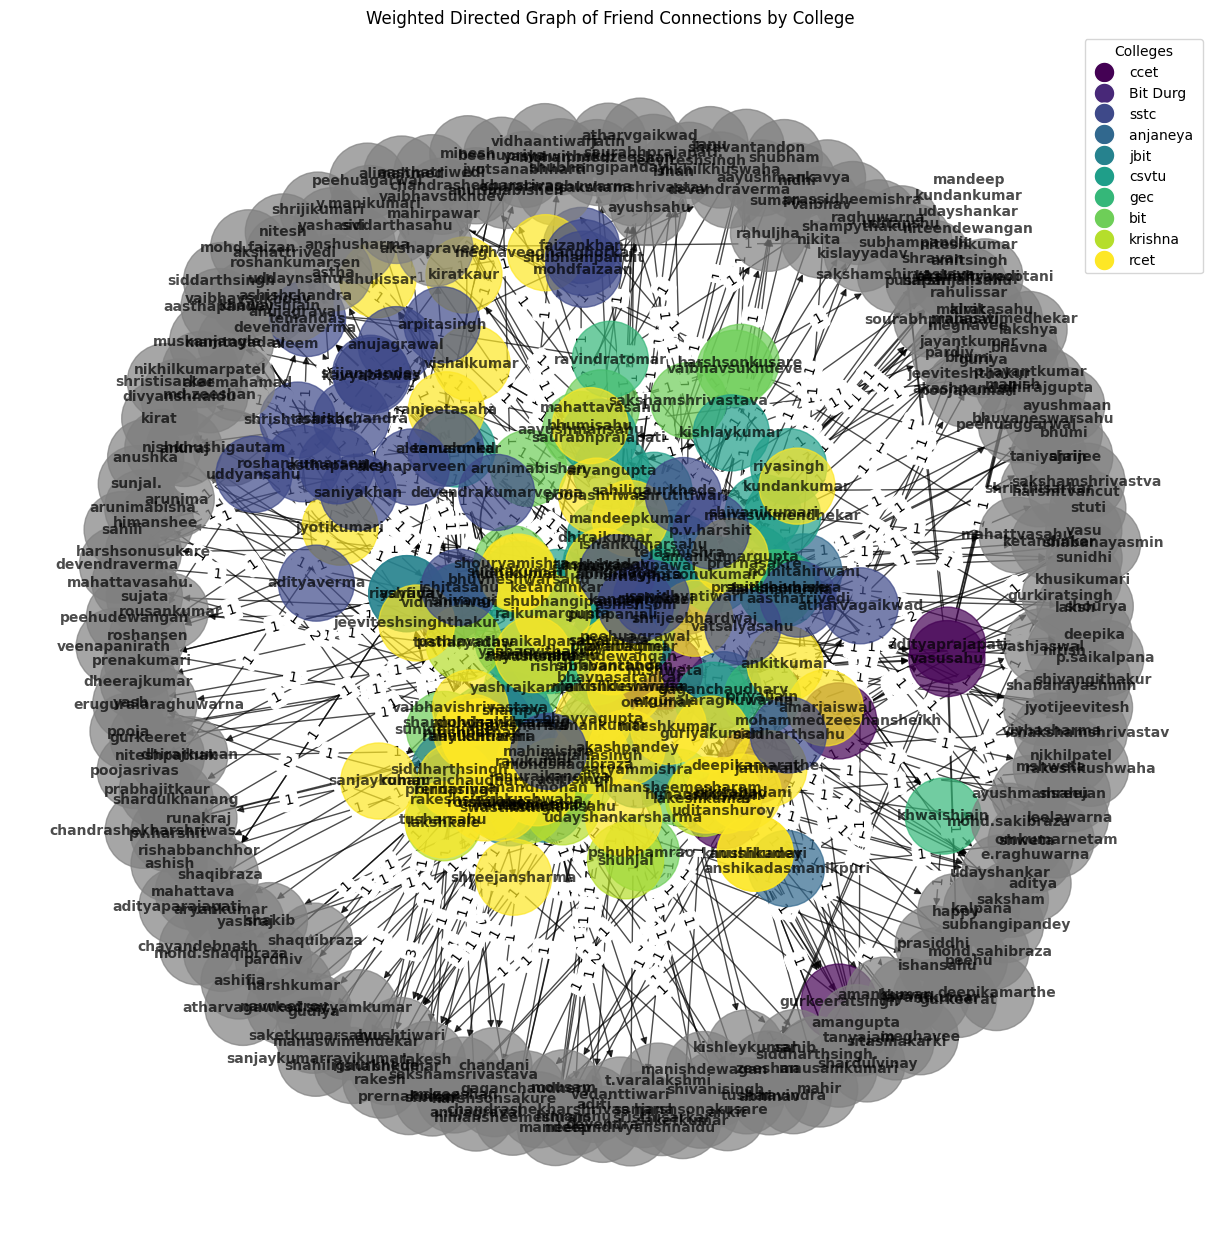

In [6]:


!pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges with weights and college information
for index, row in new_df.iterrows():
    source = row['source']
    destination = row['destination']
    college = row['college']

    # Add nodes if they don't exist
    if source not in G:
        G.add_node(source, college=college)
    if destination not in G:
        # We might not have college information for the destination if they are not in the original list
        # You might want to handle this case, perhaps by looking up their college if available
        # For now, we'll add the node without college info if it's not in the original data
        if destination not in df['Full Name'].str.lower().str.replace(' ', '').values:
             G.add_node(destination) # Add without college info
        else:
             # If the destination is in the original data, find their college
             dest_college = df[df['Full Name'].str.lower().str.replace(' ', '') == destination]['College Name'].iloc[0]
             G.add_node(destination, college=dest_college)


    # Add edge with weight (you can define weight based on your criteria, here it's 1 for simplicity)
    # If you want to count how many times a connection is made, you can add weight here
    if G.has_edge(source, destination):
        G[source][destination]['weight'] += 1
    else:
        G.add_edge(source, destination, weight=1)


# Map college names to colors
# Get unique colleges and assign a color to each
unique_colleges = set(nx.get_node_attributes(G, 'college').values())
color_map = plt.cm.get_cmap('viridis', len(unique_colleges))
college_colors = {college: color_map(i) for i, college in enumerate(unique_colleges)}

# Assign colors to nodes based on their college
node_colors = [college_colors.get(G.nodes[node].get('college'), 'gray') for node in G.nodes()] # Default to gray if college info is missing

# Draw the graph
pos = nx.spring_layout(G)  # You can use different layouts like spectral_layout, circular_layout, etc.

plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color=node_colors, font_size=10, font_weight='bold', alpha=0.7, arrows=True)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Create a legend for college colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=college,
                              markerfacecolor=color, markersize=15)
                   for college, color in college_colors.items()]
plt.legend(handles=legend_elements, title="Colleges")


plt.title("Weighted Directed Graph of Friend Connections by College")
plt.show()

In [7]:

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
in_degree_centrality = nx.in_degree_centrality(G)
out_degree_centrality = nx.out_degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Store centrality measures in a dictionary
centrality_measures = {
    'Degree Centrality': degree_centrality,
    'In-Degree Centrality': in_degree_centrality,
    'Out-Degree Centrality': out_degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality,
}

# State top 4 nodes for each centrality measure
print("\nTop 4 Nodes for Each Centrality Measure:")
for measure_name, measure_values in centrality_measures.items():
    # Sort nodes by centrality value in descending order
    sorted_nodes = sorted(measure_values.items(), key=lambda item: item[1], reverse=True)

    print(f"\n--- {measure_name} ---")
    for node, centrality in sorted_nodes[:4]:
        print(f"{node}: {centrality:.4f}")


Top 4 Nodes for Each Centrality Measure:

--- Degree Centrality ---
peehuagrawal: 0.0585
arnavjha: 0.0560
harshsharma: 0.0534
ashishchandra: 0.0534

--- In-Degree Centrality ---
arnavjha: 0.0305
prernasakre: 0.0254
harshsharma: 0.0254
satyammishra: 0.0254

--- Out-Degree Centrality ---
peehuagrawal: 0.0534
ishankumarsahu: 0.0382
niteendewangan: 0.0382
mandeepkumar: 0.0356

--- Betweenness Centrality ---
aayushmansahu: 0.0152
vidhantiwari: 0.0146
aleemahmed: 0.0085
ashishchandra: 0.0079

--- Closeness Centrality ---
akshattrivedi: 0.0404
shivangi: 0.0361
arnavjha: 0.0312
prernasakre: 0.0295


In [8]:

# State lowest 4 nodes for each centrality measure
print("\nLowest 4 Nodes for Each Centrality Measure:")
for measure_name, measure_values in centrality_measures.items():
    # Sort nodes by centrality value in ascending order
    sorted_nodes = sorted(measure_values.items(), key=lambda item: item[1])

    print(f"\n--- {measure_name} ---")
    for node, centrality in sorted_nodes[:4]:
        print(f"{node}: {centrality:.4f}")


Lowest 4 Nodes for Each Centrality Measure:

--- Degree Centrality ---
chandrashekharsrivas: 0.0025
gaganchaudhery: 0.0025
chandrashekharshrivas: 0.0025
shabanayashmin: 0.0025

--- In-Degree Centrality ---
himansheemesharam: 0.0000
sakshamshrivastava: 0.0000
mohammedzeeshansheikh: 0.0000
pathlavathsaikalpanabai: 0.0000

--- Out-Degree Centrality ---
omkumarnetam: 0.0000
shabanayasmin: 0.0000
chandrashekharsrivas: 0.0000
chandrashekharshriwas: 0.0000

--- Betweenness Centrality ---
omkumarnetam: 0.0000
shabanayasmin: 0.0000
chandrashekharsrivas: 0.0000
omkumar: 0.0000

--- Closeness Centrality ---
himansheemesharam: 0.0000
sakshamshrivastava: 0.0000
mohammedzeeshansheikh: 0.0000
pathlavathsaikalpanabai: 0.0000



Communities found by Girvan-Newman algorithm:

Division 1:
  Community 1: ['aasthapandey', 'aasthatrivedi', 'aasthatriwedi', 'aayushman', 'aayushmansahu', 'abhinav', 'abhinavgupta', 'aditi', 'aditisingh', 'aditya', 'adityaparajapati', 'adityaprajapati', 'adityaverma', 'akshaparveen', 'akshapraveen', 'aleemahamad', 'aleemahmed', 'alimahmed', 'anujagraval', 'anujagrawal', 'anurimabishen', 'arpitasingh', 'arunima', 'arunimabisha', 'arunimabishen', 'ashish', 'ashishchandra', 'ashishsom', 'astha', 'asthapandey', 'atharvagaikwad', 'atharvagawked', 'atharvgaikwad', 'ayushmaan', 'ayushmansahu', 'bhavishyapoptani', 'bhavna', 'bhavnasarankar', 'deepika', 'deepikamarathe', 'deepikamarthe', 'devandraverma', 'devendra', 'devendrakumarverma', 'devendraverma', 'divyanshnaidu', 'faizankhan', 'gurkeerat', 'gurkeeratsingh', 'gurkeeret', 'gurkiratsingh', 'harsh', 'harshitvancut', 'harshsonakusare', 'harshsonkusare', 'harshsonsakure', 'harshsonusukare', 'himanshee', 'himansheemesharam', 'himansheemeshram

/tmp/ipython-input-9-4231573970.py:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  community_color_map = plt.cm.get_cmap('tab20', num_communities) # tab20 is good for up to 20 discrete categories


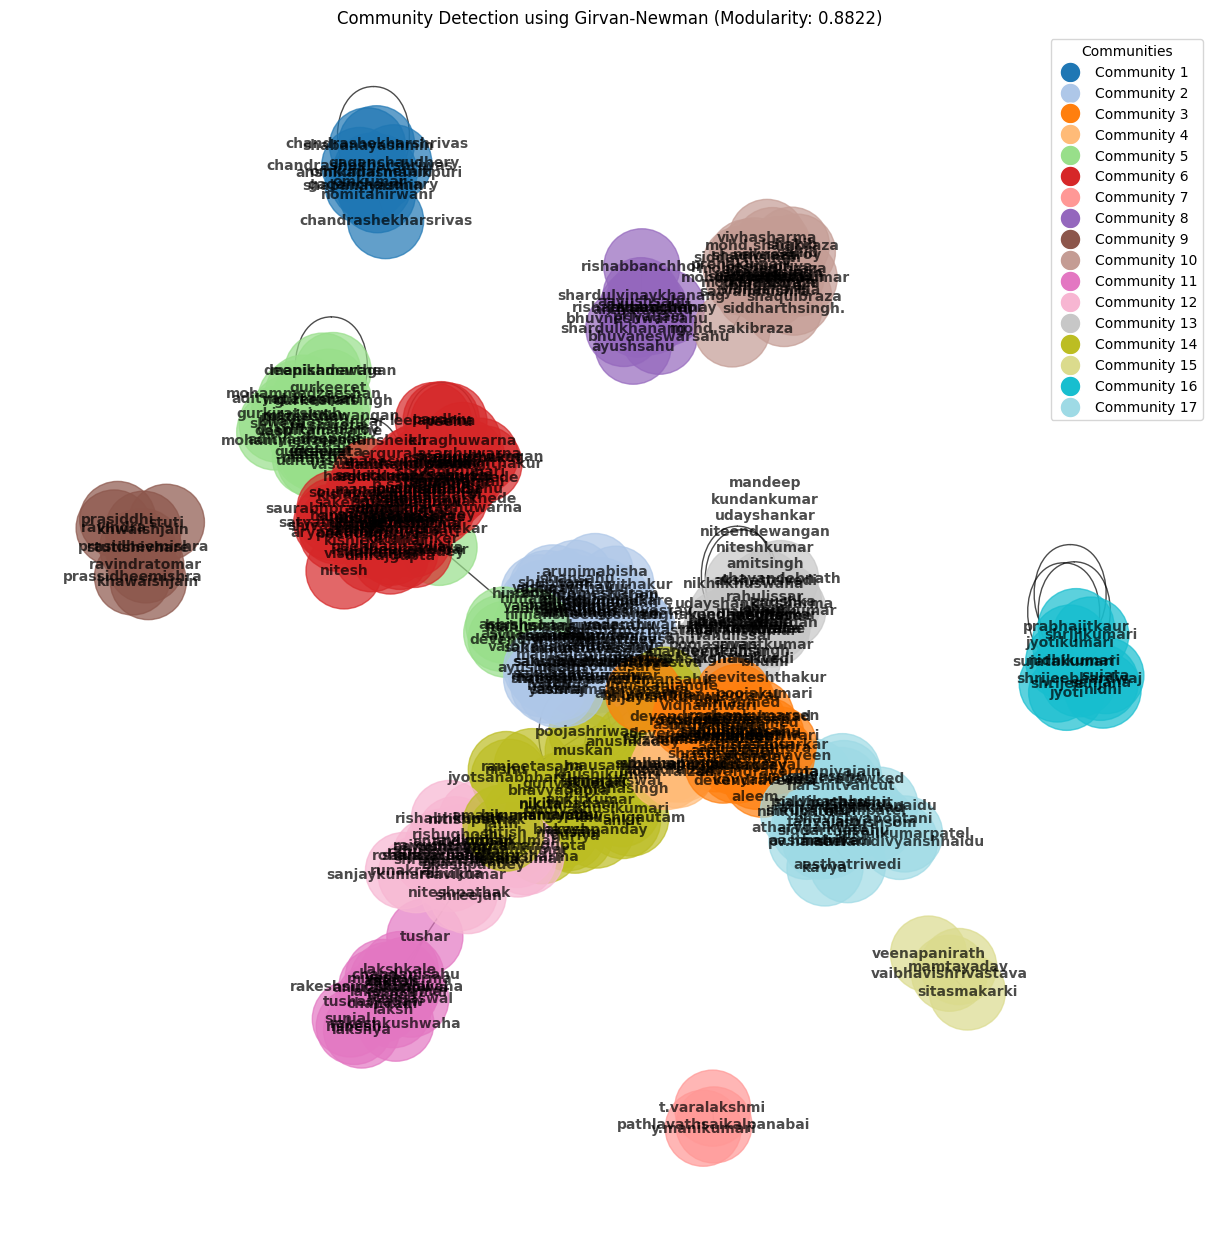

In [9]:

undirected_G = G.to_undirected()

# Apply the Girvan-Newman algorithm
# This function iteratively removes edges with the highest betweenness centrality
# and returns an iterator of community divisions at each step.
communities_generator = nx.community.girvan_newman(undirected_G)

# Iterate through the community divisions and print them
# Each element yielded by the generator is a tuple of frozensets, where each frozenset is a community.
print("\nCommunities found by Girvan-Newman algorithm:")
# We can choose to stop at a certain number of communities or based on a metric
# For demonstration, let's look at the first few divisions.
limit = 3  # Display the first 3 community divisions
for i, communities in enumerate(communities_generator):
    if i >= limit:
        break
    print(f"\nDivision {i+1}:")
    # Sort the communities by size for better readability
    sorted_communities = sorted(map(sorted, communities))
    for j, community in enumerate(sorted_communities):
        print(f"  Community {j+1}: {community}")

# You can also choose a specific division, for example, the one that maximizes modularity
# This requires calculating modularity for each division and selecting the best one.
# Let's calculate modularity for the first few divisions to illustrate.
# Reset the generator
communities_generator = nx.community.girvan_newman(undirected_G)

best_modularity = -1
best_communities = None

print("\nCalculating modularity for community divisions:")
for i, communities in enumerate(communities_generator):
     # Convert the community structure to a format compatible with modularity calculation
     # The communities are given as a tuple of frozensets
     community_list = [list(c) for c in communities]

     if len(community_list) > 1: # Modularity is not well-defined for a single community
        try:
            mod = nx.community.modularity(undirected_G, community_list)
            print(f"  Division {i+1} Modularity: {mod:.4f}")
            if mod > best_modularity:
                best_modularity = mod
                best_communities = community_list
        except Exception as e:
             print(f"Could not calculate modularity for division {i+1}: {e}")
             # This might happen if the graph becomes disconnected and a community
             # division results in a single node community that is isolated.
             # Continue to the next division if an error occurs.
             continue


if best_communities:
    print(f"\nBest community division based on modularity ({best_modularity:.4f}):")
    sorted_best_communities = sorted(map(sorted, best_communities))
    for j, community in enumerate(sorted_best_communities):
        print(f"  Community {j+1}: {community}")
else:
    print("\nCould not find a community division with positive modularity.")

# You can visualize the community structure by coloring nodes based on their community.
# Let's visualize the best community structure found (if any).
if best_communities:
    print("\nVisualizing the best community structure...")

    # Create a mapping from node to community index
    node_community_map = {}
    for i, community in enumerate(best_communities):
        for node in community:
            node_community_map[node] = i

    # Get unique community indices and assign colors
    unique_community_indices = sorted(list(set(node_community_map.values())))
    num_communities = len(unique_community_indices)
    # Use a different colormap or adjust for the number of communities
    community_color_map = plt.cm.get_cmap('tab20', num_communities) # tab20 is good for up to 20 discrete categories

    # Assign colors to nodes based on their community
    node_colors_communities = [community_color_map(node_community_map.get(node, -1)) for node in undirected_G.nodes()] # Default to a color for nodes not in any community (shouldn't happen here if using best_communities)

    # Draw the graph with community colors
    pos_undirected = nx.spring_layout(undirected_G) # Layout for the undirected graph

    plt.figure(figsize=(12, 12))
    nx.draw(undirected_G, pos_undirected, with_labels=True, node_size=3000, node_color=node_colors_communities, font_size=10, font_weight='bold', alpha=0.7)

    # Create a legend for community colors
    legend_elements_communities = [plt.Line2D([0], [0], marker='o', color='w', label=f'Community {i+1}',
                                             markerfacecolor=community_color_map(i), markersize=15)
                                  for i in unique_community_indices]
    plt.legend(handles=legend_elements_communities, title="Communities")

    plt.title(f"Community Detection using Girvan-Newman (Modularity: {best_modularity:.4f})")
    plt.show()

else:
    print("\nNo community structure to visualize based on best modularity.")


In [10]:

# Find the largest and smallest communities
if best_communities:
    # Sort communities by size
    sorted_by_size = sorted(best_communities, key=len)

    smallest_community = sorted_by_size[0]
    largest_community = sorted_by_size[-1]

    print("\nLargest Community:")
    print(f"Size: {len(largest_community)}")
    print(largest_community)

    print("\nSmallest Community:")
    print(f"Size: {len(smallest_community)}")
    print(smallest_community)
else:
    print("\nNo communities found to determine largest and smallest.")


Largest Community:
Size: 67
['manaswimendhekar', 'tanu', 'shubhangipandey', 'pardhiv', 'aryankumar', 'kislayyadav', 'kanchanpatel', 'sumankumar', 'eruguralaraghuwarna', 'sahiligaurkhede', 'shivanikumari', 'tanusonkar', 'dhirajkumar', 'shahiligaurkhede', 'manaswimedhekar', 'sourabhprajapati', 'prernasakre', 'subhangipandey', 'peehu', 'kishlaykumar', 'raghuwarna', 'shampy', 'peehuagrawal', 'e.raghuwarna', 'shivangithakur', 'shampythakur', 'leelawarna', 'shivanisingh', 'nitesh', 'riyasingh', 'vishalkumar', 'dhirajkuman', 'suman', 'manaswimendekar', 'kalpana', 'pushpanjalisahu', 'ketandinker', 'peehuagarwal', 'shivangi', 'pushpanjali', 'shivani', 'p.saikalpana', 'happy', 'ketandinkar', 'tejasmishra', 'saketkumarsahu', 'harshsharma', 'saurabhprajapati.', 'aryangupta', 'dheerajkumar', 'dhirajgupta', 'peehudewangan', 'satyamjha', 'eguralaraghuwarna', 'peehuaggarwal', 'shubhangipanday', 'erguralaraghuwarna', 'kishleykumar', 'harshkumar', 'satyamkumar', 'arnavjha', 'saketkumar', 'pardiv', 'sah

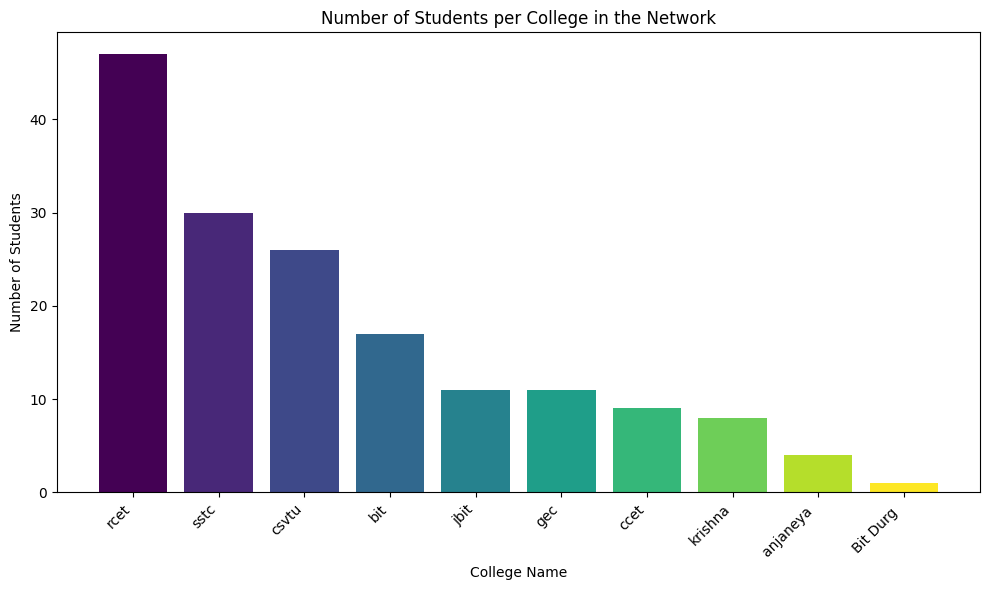

<Figure size 1200x800 with 0 Axes>

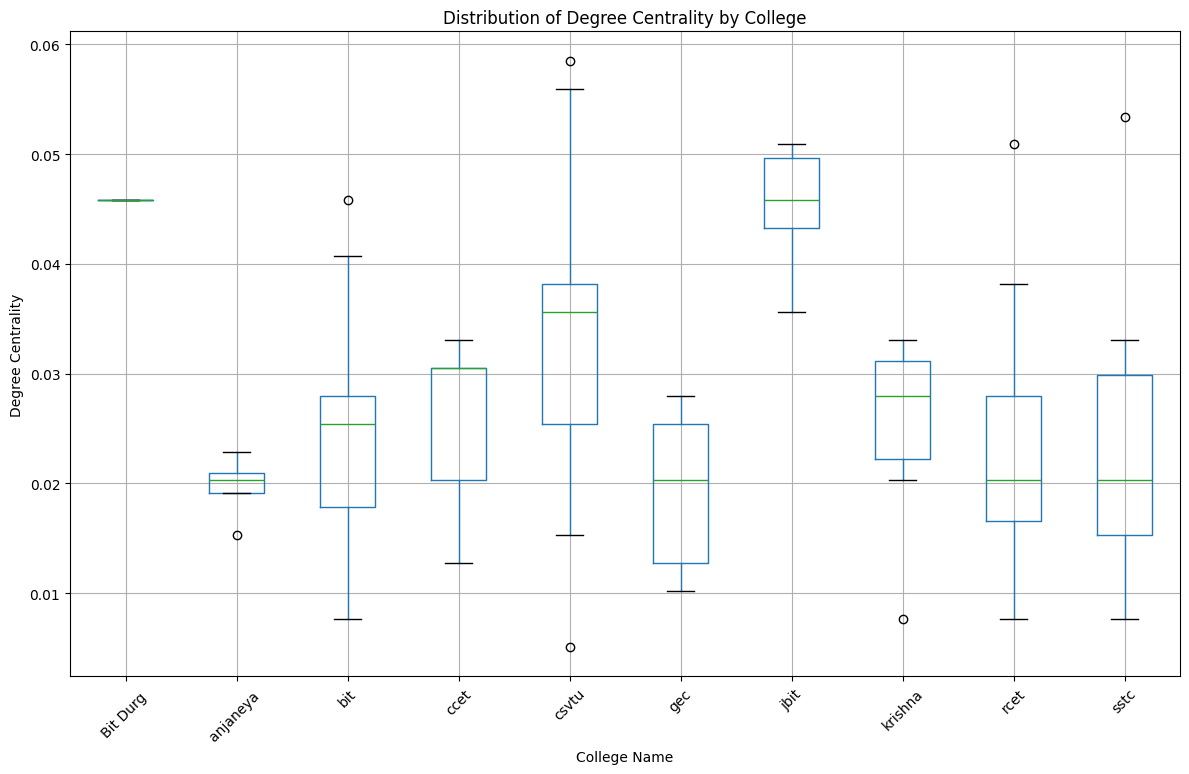

In [11]:
# Get the 'college' attribute for each node
node_colleges = nx.get_node_attributes(G, 'college')

# Create a list of nodes, their colleges, and their degree centrality
nodes_data = []
for node, college in node_colleges.items():
    nodes_data.append({'Node': node, 'College': college, 'Degree Centrality': degree_centrality.get(node, 0)}) # Get degree centrality, default to 0 if not found

# Convert to a DataFrame for easier plotting
nodes_df = pd.DataFrame(nodes_data)

# Group by college and count the number of nodes in each college
college_counts = nodes_df['College'].value_counts().reset_index()
college_counts.columns = ['College', 'Number of Students']

# Plot a bar graph of the number of students per college
plt.figure(figsize=(10, 6))
plt.bar(college_counts['College'], college_counts['Number of Students'], color=college_colors.values()) # Use the color map defined earlier
plt.xlabel("College Name")
plt.ylabel("Number of Students")
plt.title("Number of Students per College in the Network")
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# You can also visualize the distribution of degree centrality per college
plt.figure(figsize=(12, 8))
# Using a boxplot to show the distribution of degree centrality within each college
nodes_df.boxplot(column='Degree Centrality', by='College', figsize=(12, 8), rot=45)
plt.xlabel("College Name")
plt.ylabel("Degree Centrality")
plt.title("Distribution of Degree Centrality by College")
plt.suptitle("") # Remove the default suptitle generated by boxplot
plt.tight_layout()
plt.show()

In [12]:

!pip install plotly kaleido

import plotly.graph_objects as go
import plotly.express as px

# Use the position calculated by networkx for consistency if needed
pos = nx.spring_layout(G)

# Create lists for Plotly
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None) # This breaks the line
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)


# Create edge trace
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Create node trace
node_x = []
node_y = []
node_text = []
node_color_list = []
node_college_list = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    college = G.nodes[node].get('college', 'Unknown') # Get college, default to 'Unknown'
    node_college_list.append(college)
    # Use the defined color map to get the color value
    color_value = college_colors.get(college, 'gray') # Get color value, default to gray
    # Convert matplotlib color (RGBA tuple) to a Plotly compatible format (e.g., hex)
    # This requires converting the RGBA tuple to hex
    import matplotlib.colors as mcolors
    if isinstance(color_value, tuple):
         node_color_list.append(mcolors.to_hex(color_value))
    else: # Handle 'gray' or other string color names directly if Plotly supports them
         node_color_list.append(color_value)


    # Add node information to hover text
    hover_info = f'Name: {node}<br>College: {college}<br>Degree Centrality: {degree_centrality.get(node, 0):.4f}'
    node_text.append(hover_info)


node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    text=node_text,
    marker=dict(
        showscale=False,
        colorscale='viridis', # Can use any built-in colorscale, but we'll use custom colors below
        reversescale=True,
        color=node_color_list, # Use the list of colors based on college
        size=15,
        colorbar=dict(
            thickness=15,
            title='College Color Scale',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))


# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network Graph colored by College',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    axref='x',
                    ayref='y',
                    xref='x',
                    yref='y')],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
               )


unique_colleges = list(set(node_college_list))
for college in unique_colleges:
    if college != 'Unknown': # Avoid adding 'Unknown' to legend if not desired
        college_color = college_colors.get(college, 'gray')
        if isinstance(college_color, tuple):
            college_color = mcolors.to_hex(college_color)

        fig.add_trace(go.Scatter(
            x=[None], y=[None], # Dummy data points
            mode='markers',
            marker=dict(size=15, color=college_color),
            legendgroup=college,
            name=college # Label for the legend
        ))


fig.update_layout(legend_title_text='Colleges')


fig.show()

/usr/local/lib/python3.11/dist-packages/kaleido/__init__.py:14: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.


